In [1]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
plt.style.use(["science","no-latex", "/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle"])
%config InlineBackend.figure_format = 'svg'
#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")

15280


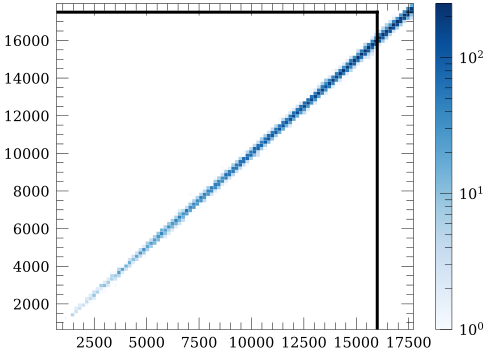

In [2]:
from LoadMultiFiles import LoadOneFileUproot
from PlotDetectorGeometry import GetR_XYZ
# dict_track = LoadOneFileUproot("root://junoeos01.ihep.ac.cn//eos/juno/valprod/valprod0/Sim_DSNB/Sim_DSNB/neutron_0_0_0/detsim/user-root/user-detsim-978.root",
#                                name_branch="mu_tracking", return_list=False)
v_kine_total = []
v_captureLength_total = []
v_startR_total = []
v_stopR_total = []
v_pdgID_total = []
for i in range(100):
    dict_nCapture = LoadOneFileUproot(f"/junofs/users/valprod2/CI_scripts/supernova-burst/sn/intp2013.data/1/10/{i}/0/det_user.root",
                                   name_branch="nCapture", return_list=False)
    dict_primary_track = LoadOneFileUproot(f"/junofs/users/valprod2/CI_scripts/supernova-burst/sn/intp2013.data/1/10/{i}/0/det_user.root",
                                      name_branch="prmtrkdep", return_list=False)
    index_evtID =dict_primary_track["evtID"][[True if (v_pdgID==np.array([-11, 2112])).all() or (v_pdgID==np.array([2112, -11])).all() else False for v_pdgID in     dict_primary_track["PDGID"] ]]
    index_nCapture = [True if evtID in index_evtID else False for evtID in dict_nCapture["evtID"]]
    v_kine_total = np.concatenate((v_kine_total,[np.max(v_kine) if len(v_kine)>0 else 0 for v_kine in dict_nCapture["kine"][index_nCapture]]))
    v_pdgID_total = np.concatenate((v_pdgID_total, dict_nCapture["pdgid"][index_nCapture]))


    v_captureLength_total = np.concatenate( (v_captureLength_total, dict_nCapture["NCTrackLength"][index_nCapture]))
    v_startR_total = np.concatenate((v_startR_total,np.concatenate(GetR_XYZ(dict_nCapture["NCStartX"][index_nCapture], dict_nCapture["NCStartY"][index_nCapture], dict_nCapture["NCStartZ"][index_nCapture])) ) )
    v_stopR_total = np.concatenate((v_stopR_total,np.concatenate(GetR_XYZ(dict_nCapture["NCStopX"][index_nCapture], dict_nCapture["NCStopY"][index_nCapture], dict_nCapture["NCStopZ"][index_nCapture])) ) )

v_captureLength_total = np.concatenate(v_captureLength_total)
# plt.hist(v_kine_total,bins=np.linspace(0,6, 100))
# plt.semilogy()
print(len(v_stopR_total))
from matplotlib.colors import LogNorm
plt.plot([0, 16000], [17500,17500],c="black")
plt.plot([16000, 16000], [0,17500],c="black")
plt.hist2d(v_startR_total, v_stopR_total, bins=100,cmap="Blues", norm=LogNorm())
plt.colorbar()


In [3]:
print(v_pdgID_total[(v_kine_total>3.1)&(v_kine_total<4.2)])


[array([        22,         22,         22,         22,         22,
                22,         22,         22, 1000060130], dtype=int32)
 array([        22,         22,         22,         22,         22,
                22,         22,         22, 1000060130], dtype=int32)
 array([        22,         22,         22,         22,         22,
                22,         22,         22,         22,         22,
                22,         22,         22,         22,         22,
                22,         22,         22, 1000060130], dtype=int32)
 array([        22,         22,         22,         22, 1000060130],
       dtype=int32)
 array([        22,         22,         22,         22,         22,
                22,         22,         22,         22,         22,
        1000060130], dtype=int32)
 array([        22,         22,         22,         22,         22,
                22,         22,         22,         22,         22,
        1000060130], dtype=int32)
 array([        22,  

In [10]:

print(v_pdgID_total[(v_kine_total==0)])


[array([], dtype=int32) array([], dtype=int32) array([], dtype=int32)
 array([], dtype=int32) array([], dtype=int32) array([], dtype=int32)
 array([], dtype=int32) array([], dtype=int32) array([], dtype=int32)
 array([], dtype=int32) array([], dtype=int32) array([], dtype=int32)
 array([], dtype=int32) array([], dtype=int32) array([], dtype=int32)
 array([], dtype=int32) array([], dtype=int32) array([], dtype=int32)
 array([], dtype=int32) array([], dtype=int32) array([], dtype=int32)
 array([], dtype=int32) array([], dtype=int32) array([], dtype=int32)
 array([], dtype=int32) array([], dtype=int32) array([], dtype=int32)
 array([], dtype=int32) array([], dtype=int32) array([], dtype=int32)
 array([], dtype=int32) array([], dtype=int32) array([], dtype=int32)
 array([], dtype=int32) array([], dtype=int32) array([], dtype=int32)
 array([], dtype=int32) array([], dtype=int32) array([], dtype=int32)]


In [4]:

print(v_pdgID_total[(v_kine_total>7)&(v_kine_total<9)])


[array([        22, 1000060140], dtype=int32)
 array([        22,         22,         22,         22, 1000060140],
       dtype=int32)                                                 ]


15318


[]

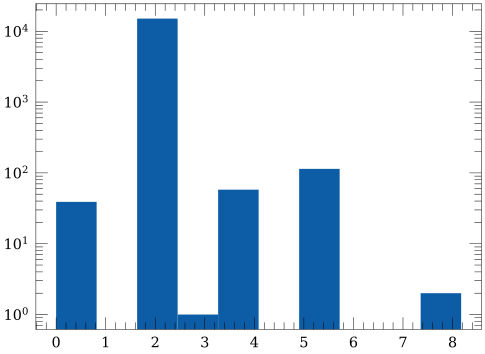

In [8]:
print(len(v_kine_total))
plt.hist(v_kine_total)
# plt.ylim(0,100)
plt.semilogy()


In [6]:
print(len(dict_nCapture["pdgid"]))
from collections import Counter
Counter(np.diff(dict_nCapture["evtID"]))

500


Counter({1: 499})

In [7]:
# for v_kine in dict_nCapture["kine"]:
#     try:
#         print(max(v_kine))
#     except :
#         print(v_kine)

v_kine = np.array([ np.max(v_kine) if len(v_kine)>0 else 0 for v_kine in dict_nCapture["kine"] ])
index_noCapture = dict_nCapture["evtID"][v_kine==0]
# for evtID in index_noCapture:
#     print("##########################################")
#     print(dict_track["pdgID"][dict_track["evtID"]==evtID])
# print( Counter(v_kine<1) )
# plt.hist([ np.max(v_kine) if len(v_kine)>0 else 0 for v_kine in dict_nCapture["kine"] ],bins=100)